<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module C: Section 19.1, 19,2, 19.3, 19.4 19.5

Danika Young

## Root Finding Problem Statement

### Definition:
A root-finding problem involves finding values of $x$ such that $f(x) = 0 $. These values are called **roots** or **zeros** of the function. Root-finding is essential in many scientific and engineering applications, such as physics, economics, and computer graphics.


### Real-World Applications:
Root-finding algorithms are used in various real-world applications such as:
- Engineering (e.g., solving for equilibrium points in mechanical systems)
- Finance (e.g., computing interest rates)
- Physics (e.g., solving motion equations)

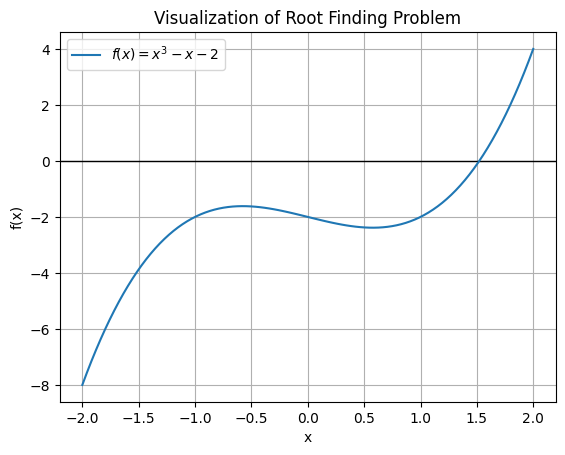

In [1]:
# This visualization helps to identify approximate locations of the root for the function f(x) = x^3 - x - 2

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 2

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

plt.axhline(0, color='black', linewidth=1)
plt.plot(x_vals, y_vals, label="$f(x) = x^3 - x - 2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.title("Visualization of Root Finding Problem")
plt.show()

In [4]:
# A simple case of root finding is solving a quadratic equation ax^2 + bx + c = 0 .
import math

def quadratic_roots(a, b, c):
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return "No real roots"
    root1 = (-b - math.sqrt(discriminant)) / (2 * a)
    root2 = (-b + math.sqrt(discriminant)) / (2 * a)
    return root1, root2

# Example: Solve x^2 - 5x + 6 = 0
a, b, c = 1, -5, 6
roots = quadratic_roots(a, b, c)
print("Roots of the quadratic equation:", roots)

Roots of the quadratic equation: (2.0, 3.0)


## Tolerance

### Definition:
Tolerance defines the acceptable error range for numerical approximations. It ensures the solution is accurate enough but avoids excessive computation. A smaller tolerance leads to more precise results but may require more iterations.


Choosing an appropriate tolerance depends on the problem’s required precision and computational efficiency.

In [7]:
tolerances = [1e-1, 1e-3, 1e-6, 1e-9]
for tol in tolerances:
    print(f"Using tolerance of {tol}")

Using tolerance of 0.1
Using tolerance of 0.001
Using tolerance of 1e-06
Using tolerance of 1e-09


In [8]:
def sample_function(x):
    return x**2 - 2

def approximate_root(tol):
    a, b = 1, 2
    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        if sample_function(midpoint) == 0:
            return midpoint
        elif sample_function(a) * sample_function(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2

for tol in tolerances:
    root = approximate_root(tol)
    print(f"Root found with tolerance {tol}: {root}")

Root found with tolerance 0.1: 1.4375
Root found with tolerance 0.001: 1.4150390625
Root found with tolerance 1e-06: 1.4142141342163086
Root found with tolerance 1e-09: 1.4142135614529252


## Bisection Method

### Explanation:
- The **Bisection Method** is a numerical technique for finding roots of a function in a given interval \([a, b]\) where \( f(a) \) and \( f(b) \) have opposite signs.
- The method works by repeatedly dividing the interval into two halves and selecting the half where the function changes sign.
- The process continues until the difference between consecutive midpoints is smaller than the specified tolerance.


### Advantages:
- Always converges to a root (if one exists in the interval)
- Simple and robust

### Disadvantages:
- Slower compared to other methods
- Requires an initial interval where the function changes sign


In [9]:
# Finding the root of f(x) = x^3 - x - 2 using the Bisection Method


def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        raise ValueError("Function values at a and b must have opposite signs.")

    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    return (a + b) / 2


root_bisection = bisection_method(f, 1, 2, 1e-6)
print(f"Root found using Bisection Method: {root_bisection}")

Root found using Bisection Method: 1.5213804244995117


## Newton-Raphson Method

### Explanation:
- The **Newton-Raphson Method** is an iterative method that uses derivatives to approximate the root.
- The formula used is:
  \[ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \]
- This method converges much faster than the Bisection Method but requires that the derivative of the function be known.

### Advantages:
- Fast convergence
- Efficient for well-behaved functions

### Disadvantages:
- Requires computing the derivative \( f'(x) \)
- May fail if \( f'(x) = 0 \) at any point in the iteration
- Not always guaranteed to converge

In [10]:
# Using Newton-Raphson to find the root of f(x) = x^3 - x - 2.

def df(x):
    return 3*x**2 - 1

def newton_raphson(f, df, x0, tol, max_iter=100):
    x = x0
    for _ in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x


root_newton = newton_raphson(f, df, 1.5, 1e-6)
print(f"Root found using Newton-Raphson Method: {root_newton}")

Root found using Newton-Raphson Method: 1.5213797068045751


## Conclusion

- **Bisection Method** is reliable but slower, suitable for cases where the function changes sign in a given interval.
- **Newton-Raphson Method** is faster but requires the derivative and may fail in some cases.
- Tolerance plays a crucial role in ensuring accuracy while keeping computations efficient.
- Both methods approximate the root of \( f(x) = x^3 - x - 2 \) effectively.